# Cifar-Dataset

https://www.cs.toronto.edu/~kriz/cifar.html

### ImageDataGenerator
- Erhöhung der Datenmenge durch Verschieben, Drehen, etc. der Rohdaten

https://keras.io/preprocessing/image/

Import der Tranings- und Testdate

In [25]:
from keras.datasets import cifar10

Laden und Aufteilung der Daten in Trainings- und Testdaten (tupel)

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalisierung der Daten
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

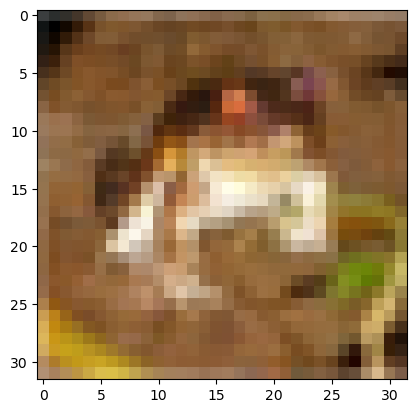

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

Festlegen der Ausgangsdaten y_train=1 für Auto

In [28]:
y_train_car = y_train == 1

Zusätzliche Daten generieren mit ImageDateGenerator

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)
Docstring:      DEPRECATED.
File:           ~/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py
Type:           type
Subclasses:     

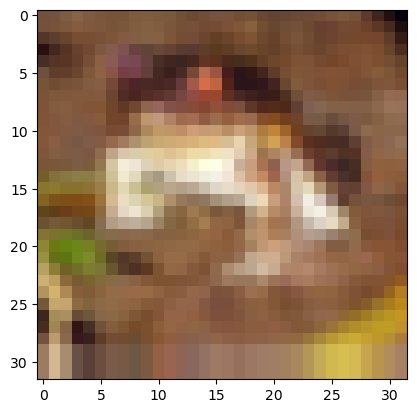

In [31]:
gen = ImageDataGenerator(width_shift_range=3, # Shift um 3 Pixel
                         height_shift_range=3, # Shift
                         zoom_range=0.1, # Zoom
                         horizontal_flip=True, # horizontales Spiegeln
                         featurewise_center=True, # zentriert die Daten
                         featurewise_std_normalization=True) # skaliert die Daten

gen.fit(X_train)
# Beispiel zum Demonstrieren der Bildtransformation(Shift, Rotation) mit Shuffle=False
for batch in gen.flow(X_train, y_train, shuffle=False):
    first_image = batch[0][0]
    plt.imshow((first_image - first_image.min()) / (first_image.max() - first_image.min()))
    plt.show()
    break

In [32]:
gen.__dict__

{'featurewise_center': True,
 'samplewise_center': False,
 'featurewise_std_normalization': True,
 'samplewise_std_normalization': False,
 'zca_whitening': False,
 'zca_epsilon': 1e-06,
 'rotation_range': 0,
 'width_shift_range': 3,
 'height_shift_range': 3,
 'shear_range': 0.0,
 'zoom_range': [0.9, 1.1],
 'channel_shift_range': 0.0,
 'fill_mode': 'nearest',
 'cval': 0.0,
 'horizontal_flip': True,
 'vertical_flip': False,
 'rescale': None,
 'preprocessing_function': None,
 'dtype': 'float32',
 'interpolation_order': 1,
 'data_format': 'channels_last',
 'channel_axis': 3,
 'row_axis': 1,
 'col_axis': 2,
 '_validation_split': 0.0,
 'mean': array([[[0.4914009 , 0.48215896, 0.4465308 ]]], dtype=float32),
 'std': array([[[0.24703272, 0.2434843 , 0.26158753]]], dtype=float32),
 'zca_whitening_matrix': None,
 'brightness_range': None}

### Netz trainieren für Cifar10-Daten
- Sequential-Modell mit Conv2D-, MaxPooling2D-, Dropout-, Flatten und Dense-Layers
- Input-Shape 32x32 entsprechend der Bildgröße (32x32 Pixel)
- Ersten Conv2D-Layers zur Kanten- und Mustererkennung
- Padding zur Erhaltung der Dimensionen bzw. Verlust von Dimension durch Conv2D-Layers
- MaxPooling2D-Layer zur Datenreduktion
- DropOut-Layer zur Reduktion schwacher NN-Links

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same")) # Kantenerkennung
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu', padding="same")) # Mustererkennung
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 1 Klasse (Auto)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
### Modell visualisieren: https://keras.io/visualization/
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147,425 (4.38 MB)

 Trainable params: 1,147,425 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

Modeltraining

In [36]:
#model.fit(X_train, y_train_car, batch_size=128, epochs=10, shuffle=True)

model.fit(gen.flow(X_train, y_train_car, batch_size=128, shuffle=True), epochs=10)

Epoch 1/10


/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9126 - loss: 0.2398
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9394 - loss: 0.1548
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.9547 - loss: 0.1220
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9623 - loss: 0.1045
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9672 - loss: 0.0896
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.9704 - loss: 0.0817
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.9730 - loss: 0.0764
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9751 - loss: 0.0701
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.9765 - loss: 0.0678
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9773 - loss: 0.0635


Modellevaluierung

In [39]:
print(model.evaluate(gen.flow(X_train, y_train_car)))

  15/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9725 - loss: 0.0645

/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9821 - loss: 0.0531
[0.05313584581017494, 0.9821000099182129]


In [40]:
print(model.evaluate(gen.flow(X_test, y_test == 1)))

 15/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9576 - loss: 0.1100

/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9749 - loss: 0.0686
[0.06858789920806885, 0.9749000072479248]


Modell 'cardetector' speichern

In [42]:
# Modell 'cardetector' speichern
model.save('cardetector.keras')